In [1]:
from flighttools import flight, visuals
import openapi_client
import os

imdir = "/Users/jokedurnez/Documents/Integrations/Johnson-Co-IA/graphs"
basedir = "/Users/jokedurnez/Documents/Integrations/Johnson-Co-IA/"

# baseurl = 'http://localhost:8080'
# jwt = "***"
baseurl = 'https://api.openlattice.com'
jwt = "*"

configuration = openapi_client.Configuration()
configuration.host = baseurl
configuration.api_key_prefix['Authorization'] = 'Bearer'
configuration.api_key['Authorization'] = jwt

edmAPI = openapi_client.EdmApi(openapi_client.ApiClient(configuration))
dataAPI = openapi_client.DataApi(openapi_client.ApiClient(configuration))

# Jail

In [2]:
filename= os.path.join(basedir,'JohnsonCountyJail.yaml')
fl = flight.flight(edmAPI=edmAPI)
fl.deserialise(filename)
fl.add_and_check_edm()

In [3]:
entsets = fl.get_all_entitysets()
for entset in entsets:
    entsetid = edmAPI.get_entity_set_id(entset['name'])
    size = dataAPI.get_entity_set_size(entsetid)
    print("%s: %i"%(entset['name'], size))

JohnsonCounty_IowaCity_People4: 27
JohnsonCounty_IowaCity_BondRelative: 0
JohnsonCounty_IowaCity_People3: 43182
JohnsonCounty_IowaCity_JCOfficers: 14890
JohnsonCounty_IowaCity_JCJIPersonDetails3: 39752
JohnsonCounty_IowaCity_JCOfficerInfo: 1109
JohnsonCounty_IowaCity_JCPersondetailsCJ: 39760
JohnsonCounty_IowaCity_JCAgencies: 1125
JohnsonCounty_IowaCity_BondBusiness: 8
JohnsonCounty_IowaCity_JCBond: 0
JohnsonCounty_IowaCity_JCJailStay: 79675
JohnsonCounty_IowaCity_JCCharge: 1027
JohnsonCounty_IowaCity_JCJailStayLength: 79675
JohnsonCounty_IowaCity_JCSentences: 716
JohnsonCounty_IowaCity_JCOffenses: 4668
JohnsonCounty_IowaCity_JCCourt: 54374
JohnsonCounty_IowaCity_JCFacility: 20
JohnsonCounty_IowaCity_JCBooking: 79675
JohnsonCounty_IowaCity_JCis: 40869
JohnsonCounty_IowaCity_JCWorksAt: 76513
JohnsonCounty_IowaCity_JCSubjectOf: 79675
JohnsonCounty_IowaCity_JCChargedWith: 77509
JohnsonCounty_IowaCity_JCSentencedWith: 77801
JohnsonCounty_IowaCity_JCOfLength: 79675
JohnsonCounty_IowaCity_JC

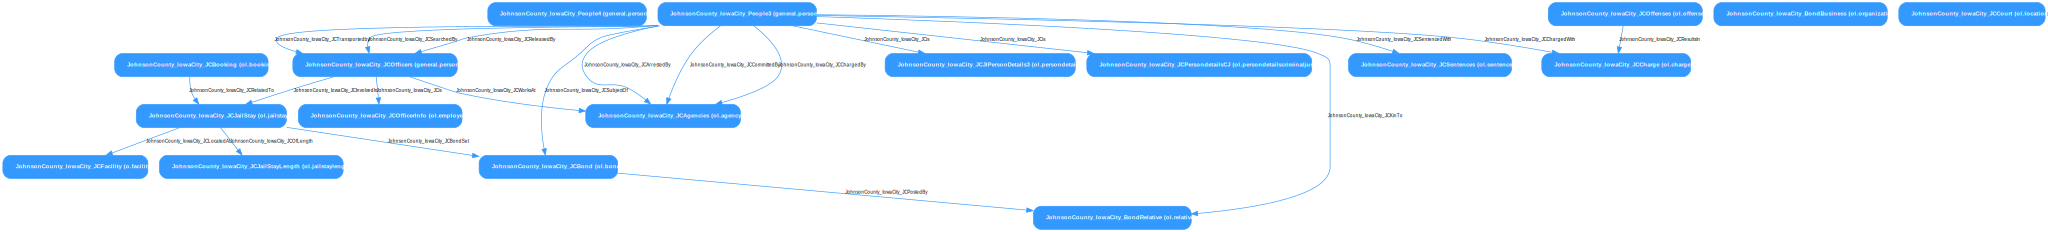

In [4]:
visualisation = visuals.edmViz(fl, engine='dot')
fullplot = visualisation.create_flight_plot(type="entityset_name", split_associations=False)
fullplot.format = 'png'
fullplot.render(os.path.join(imdir, "JCJail_small"))
fullplot

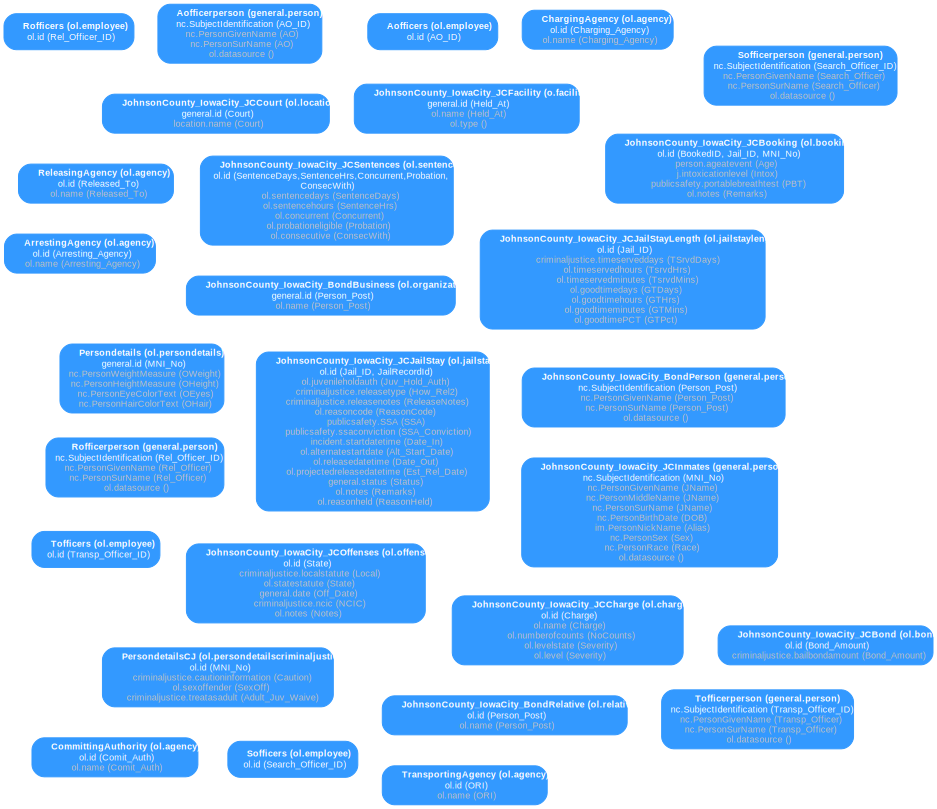

In [5]:
visualisation = visuals.edmViz(fl, engine='circo')
fullplot = visualisation.create_flight_plot(type="name", fields=['properties'], split_associations=False, plotlinks=False)
fullplot.format = 'png'
fullplot.render(os.path.join(imdir, "JCJail_full"))
fullplot